In [1]:
# copyright ############################### #
# This file is part of the Xtrack Package.  #
# Copyright (c) CERN, 2021.                 #
# ######################################### #


import xtrack as xt
import xobjects as xo
import xpart as xp

import ducktrack as dtk
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider
from tqdm import tqdm








beta_rel = 0.305
#beta_rel = 0.106

gamma = 1.050
#gamma = 1.006


I=2.4
L = 1.5 # m cooler length
r_beam=25*1e-3

mass0=938.27208816*1e6 #ev/c^2

T_perp = 0.01 # <E> [eV] = kb*T
T_l =  0.001 # <E> [eV]
B = 0.060 # T for AD
B_ratio=1e-10
Z=1


c=299792458.0

p0c = mass0*beta_rel*gamma #eV/c



length = 182.43280000000 #m
T = length/(c*beta_rel)
ms_per_turn = 1000*T





beta_x=10 
beta_y=4
emittance=10*1e-6

arc=dtk.LinearTransferMatrix(Q_x=5.38518956965, Q_y=5.36921653748,
                            beta_x_0=beta_x, beta_x_1=beta_x,
                            beta_y_0=beta_y,  beta_y_1=beta_y,
                            alpha_x_0=0,   alpha_x_1=0,
                            alpha_y_0=0,   alpha_y_1=0,
                            disp_x_0=0,disp_x_1=0,
                            disp_y_0=0,    disp_y_1=0,
                            beta_s=1*1e40,
                            Q_s=0,
                            chroma_x=0.0, chroma_y=0
                                           
                 )

In [2]:
num_particles=1
emittance=35*1e-6 #inital emittance

x_init=np.sqrt(beta_x*emittance)
y_init=np.sqrt(beta_y*emittance)

dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=x_init,
        px=y_init,
        y=0,
        py=0,
        delta=1e-3,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()


dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=1e-3)

       


num_turns=int(5*1e7)
step=1000

# initialize arrays
x = []
px = []
action_x = []



for i in tqdm(range(num_turns)):
    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        
   
        # calculate action in horizontal plane
        action_x_temp = (dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
       
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
action_x = np.array(action_x)




time = np.arange(0, num_turns, step) * ms_per_turn



100%|██████████| 2500000/2500000 [03:01<00:00, 13789.64it/s]


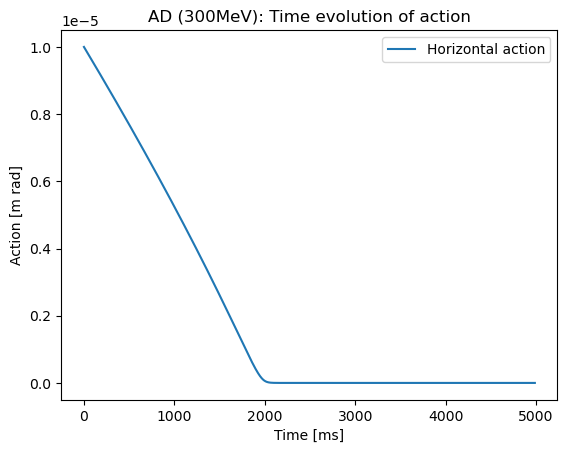

In [3]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,action_x,label='Horizontal action')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)



In [4]:
#np.save("plot_data/t.npy", time)

#np.save("plot_data/x_b_ratio=0.npy", action_x)
#np.save("plot_data/x_b_ratio=5e-4.npy", action_x)
#np.save("plot_data/x_b_ratio=1e-4.npy", action_x)








each turns different angle

In [5]:
num_particles=1
emitt_x=10*1e-6 #inital emittance

x_init=np.sqrt(2*beta_x*emitt_x)

dtk_particle = dtk.TestParticles(
        
        mass0=mass0,
        p0c=p0c,
        x=x_init,
        px=0,
        y=0,
        py=0,
        delta=0,
        zeta=0)

dtk_particle_copy_old=dtk_particle.copy()




       


num_turns=int(2.5*1e6)
step=1000

# initialize arrays
x = []
px = []
action_x = []




for i in tqdm(range(num_turns)):
    angle=np.random.normal(0,5e-4,1)
    dtk_cooler = dtk.elements.ElectronCooler(I=I,L=L,r_beam=r_beam,
                                         T_perp=T_perp,T_l=T_l,
                                         B=B,Z=Z,B_ratio=0,
                                         xp_cooler=angle)


    if i % step == 0:
        x.append(dtk_particle.x)
        px.append(dtk_particle.px)
        
   
        # calculate action in horizontal plane
        action_x_temp = 0.5*(dtk_particle.x**2/beta_x + beta_x*dtk_particle.px**2)
        action_x.append(action_x_temp)
       
    
        

    arc.track(dtk_particle)
    dtk_cooler.track(dtk_particle)
    

# convert arrays to numpy arrays
x = np.array(x)
px = np.array(px)
action_x = np.array(action_x)




time = np.arange(0, num_turns, step) * ms_per_turn

100%|██████████| 2500000/2500000 [04:52<00:00, 8532.44it/s]


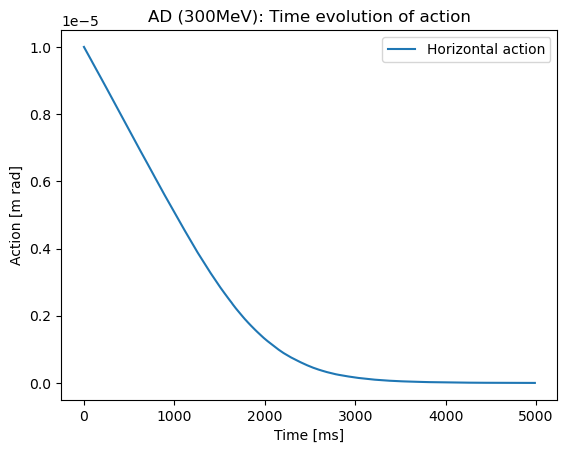

In [6]:
# Plot the horizontal action versus time
plt.figure()
plt.plot(time,action_x,label='Horizontal action')
plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
plt.title('AD (300MeV): Time evolution of action')
plt.legend()
plt.ticklabel_format(useOffset=False)


#np.save("plot_data/x_angle=5e-4.npy", action_x)


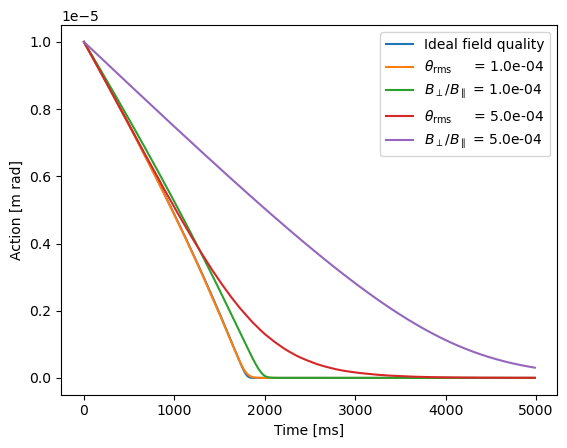

In [7]:
time=np.load('plot_data/t.npy')

x_0=np.load('plot_data/x_b_ratio=0.npy')

x_b_ratio1=np.load('plot_data/x_b_ratio=1e-4.npy')

x_b_ratio5=np.load('plot_data/x_b_ratio=5e-4.npy')

x_angle1=np.load('plot_data/x_angle=1e-4.npy')

x_angle5=np.load('plot_data/x_angle=5e-4.npy')




# plot the horizontal and vertical action vs time
plt.figure()

plt.plot(time,x_0,label="Ideal field quality")


plt.plot(time,x_angle1,label=r"$\theta_{\rm rms}$" + "     = {:.1e}".format(1e-4))


plt.plot(time,x_b_ratio1,label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(1e-4))
plt.plot(time,x_angle5,label=r"$\theta_{\rm rms}$" + "     = {:.1e}".format(5e-4))
plt.plot(time,x_b_ratio5,label="$B_{\perp}/B_{\parallel}$" + " = {:.1e}".format(5e-4))

plt.xlabel('Time [ms]')
plt.ylabel('Action [m rad]')
#plt.title('AD (300MeV): Time evolution of Horizontal action')
plt.legend()
plt.ticklabel_format(useOffset=False)
